<a href="https://colab.research.google.com/github/shub0411/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction_Classification_Problem_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mobile_df=pd.read_csv('/content/drive/MyDrive/capstone mobile/data_mobile_price_range.csv', encoding ='latin')

In [ ]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
mobile_df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
print(f' The shape of dataset is {(mobile_df.shape)} \n Total Rows are : {(mobile_df.shape)[0]}\n Total Columns are : {(mobile_df.shape)[1]}')

 The shape of dataset is (2000, 21) 
 Total Rows are : 2000
 Total Columns are : 21


In [ ]:
mobile_df.isna().sum()
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


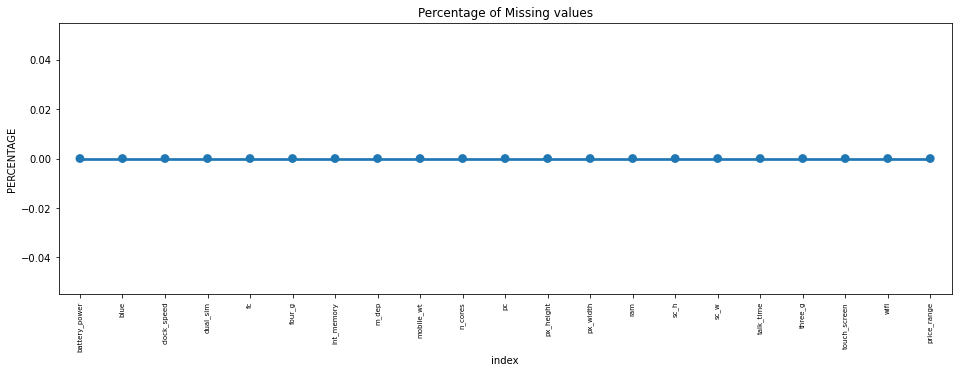

In [ ]:
missing = pd.DataFrame((mobile_df.isnull().sum())*100/mobile_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
value=len(mobile_df[mobile_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
print(mobile_df[mobile_df['sc_w']==0].shape[0])

180


In [ ]:
print(mobile_df[mobile_df['px_height']==0].shape[0])

2


In [ ]:
mobile_df=mobile_df[mobile_df['px_height']!=0]

In [ ]:
mobile_df['sc_w']=mobile_df['sc_w'].replace(0,np.nan)

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns=mobile_df.columns)

In [ ]:
mobile_df.shape

(1998, 21)

In [ ]:
mobile_df[mobile_df['sc_w']==0].shape[0]

0

# **EDA**

In [ ]:
price_range_values=mobile_df['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


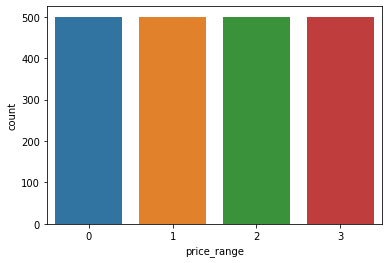

In [ ]:
sns.countplot(mobile_df['price_range'])
plt.show()

In [ ]:
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_features = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','talk_time','sc_h','sc_w']

In [ ]:
print('Bluetooth\n', mobile_df['blue'].value_counts())

Bluetooth
 0    1010
1     990
Name: blue, dtype: int64


In [ ]:
print('Dual Sim\n', mobile_df['dual_sim'].value_counts())

Dual Sim
 1    1019
0     981
Name: dual_sim, dtype: int64


In [ ]:
print('4G\n', mobile_df['four_g'].value_counts())

4G
 1    1043
0     957
Name: four_g, dtype: int64


In [ ]:
print('3G\n', mobile_df['three_g'].value_counts())

3G
 1    1523
0     477
Name: three_g, dtype: int64


In [ ]:
print('Touch Screen\n', mobile_df['touch_screen'].value_counts())

Touch Screen
 1    1006
0     994
Name: touch_screen, dtype: int64


In [ ]:
print('Wifi\n', mobile_df['wifi'].value_counts())

Wifi
 1    1014
0     986
Name: wifi, dtype: int64


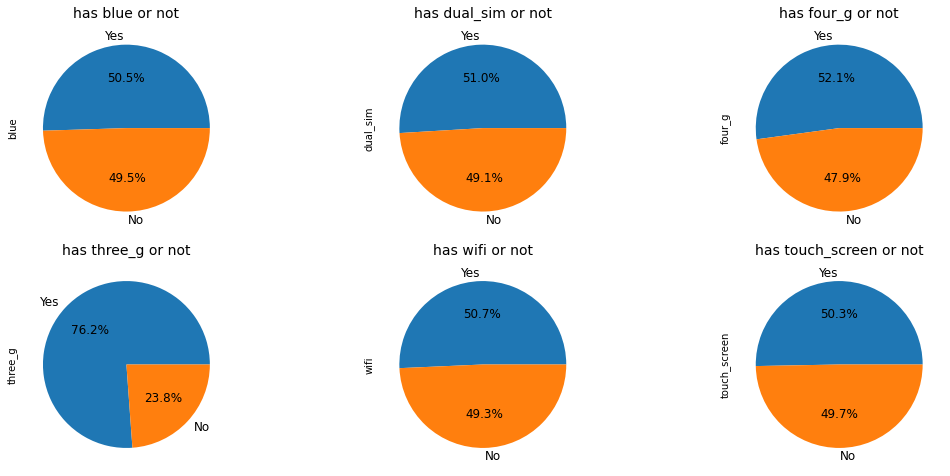

In [ ]:
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

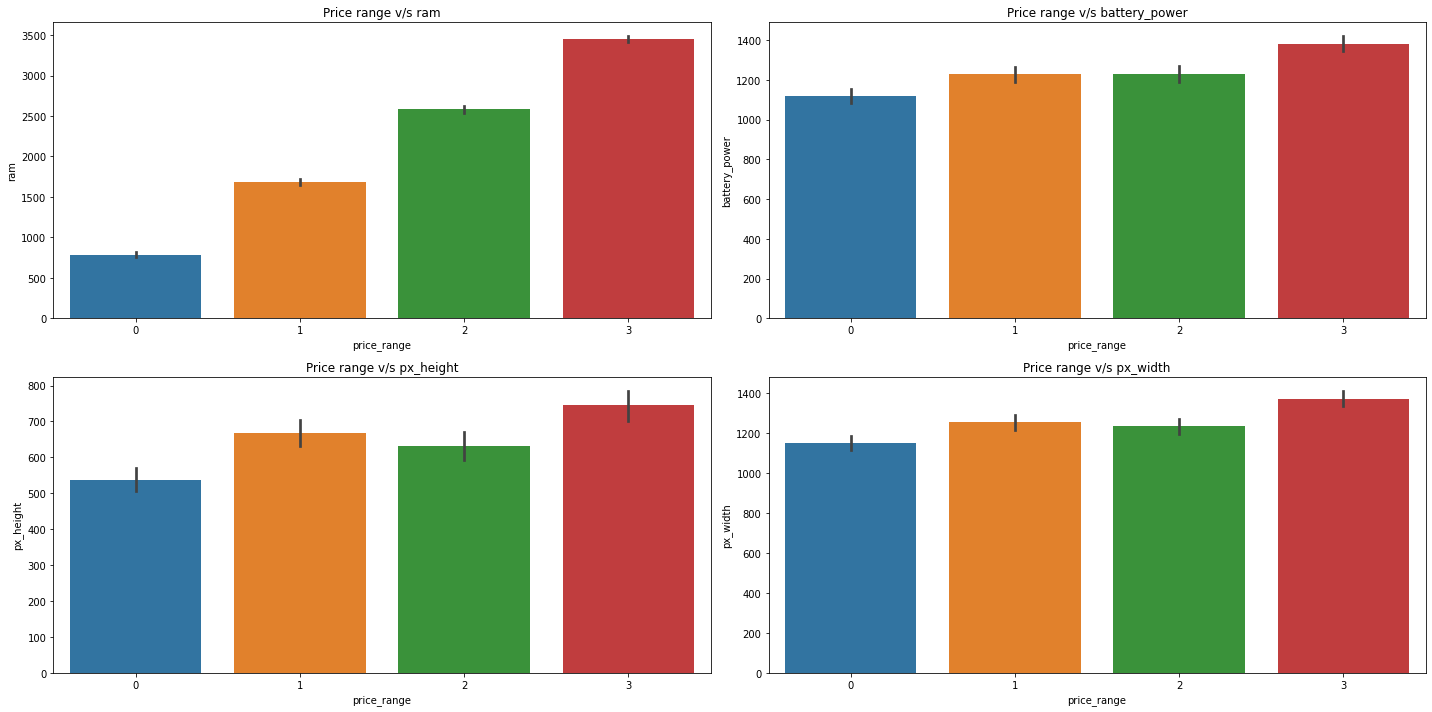

In [ ]:
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_df['price_range'],y=mobile_df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

In [ ]:
three_g_and_4g_df=mobile_df[(mobile_df['three_g']==1) & (mobile_df['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3    275
1    262
0    259
2    247
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


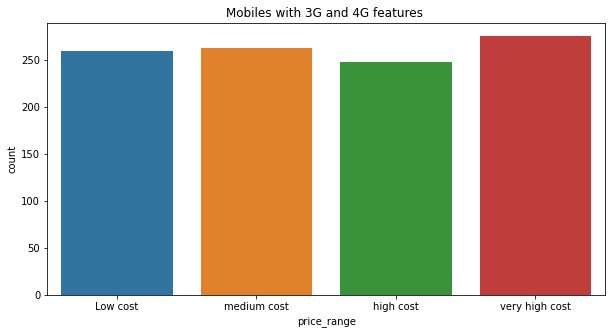

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

mobile with 3g

In [ ]:
three_g_df=mobile_df[(mobile_df['three_g']==1) & (mobile_df['four_g']!=1)]

In [ ]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,...,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,...,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,...,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,...,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,...,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1990,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,...,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1991,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,...,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1992,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,...,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


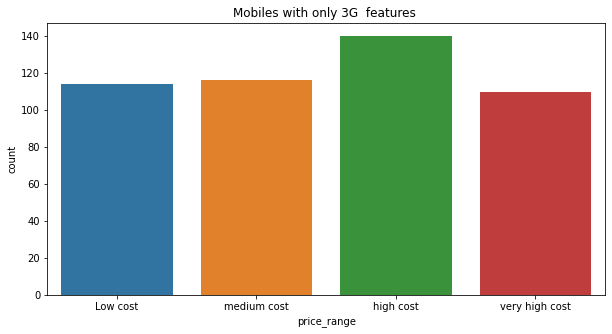

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

Mobiles not having no 3G and 4G.

In [ ]:
No_3g_4G_df=mobile_df[(mobile_df['three_g']!=1) & (mobile_df['four_g']!=1)]

In [ ]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,...,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,...,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,...,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,...,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,...,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1980,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,...,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1981,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,...,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1986,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,...,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


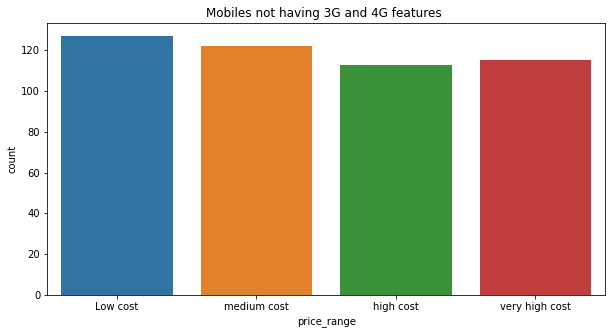

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

check the distribution of the numerical features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

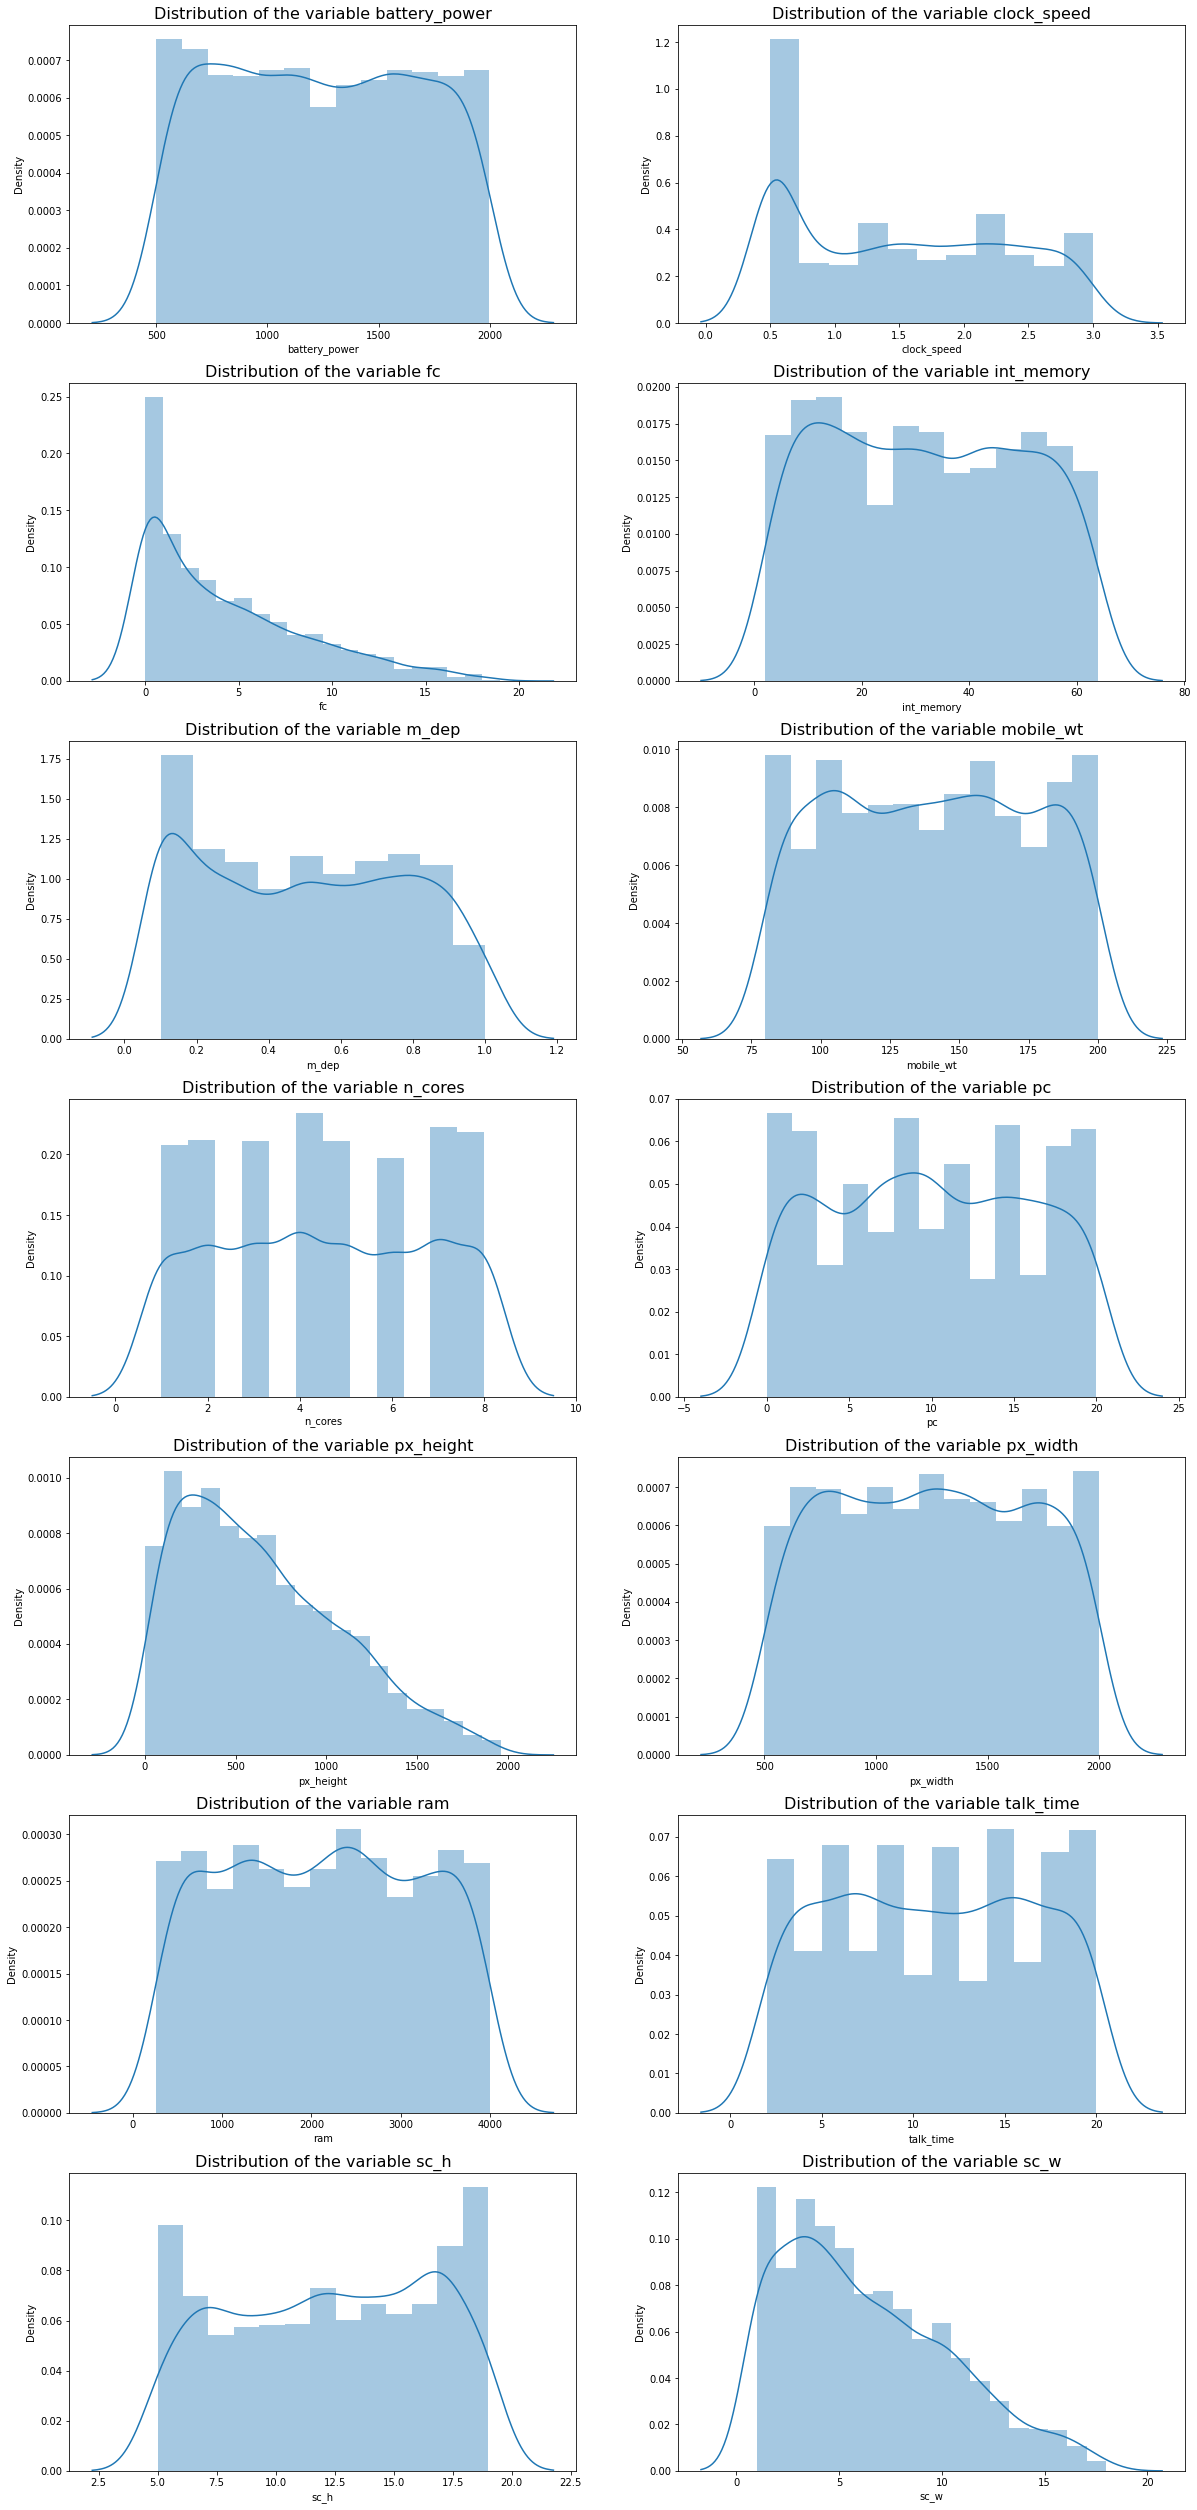

In [ ]:
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.distplot(mobile_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

Check which numerical feature is driving the price range most

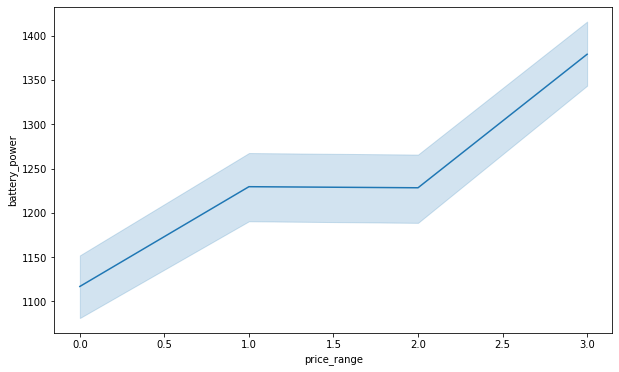

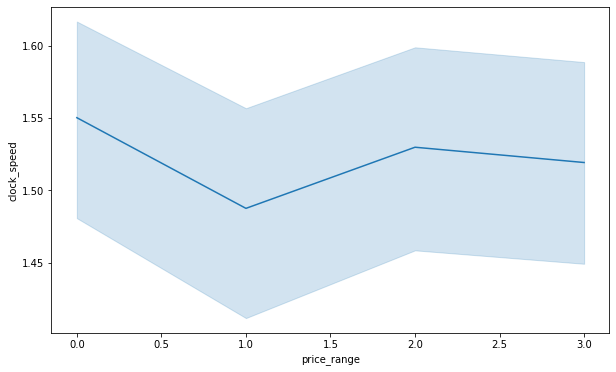

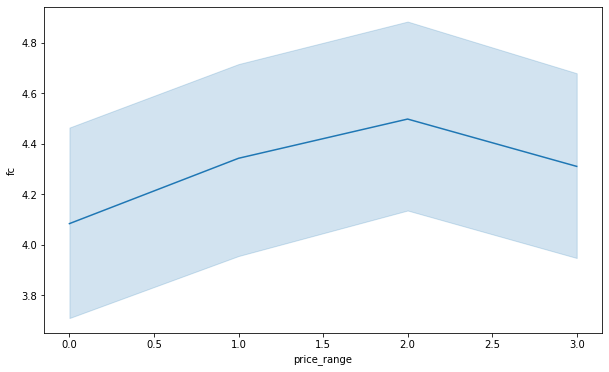

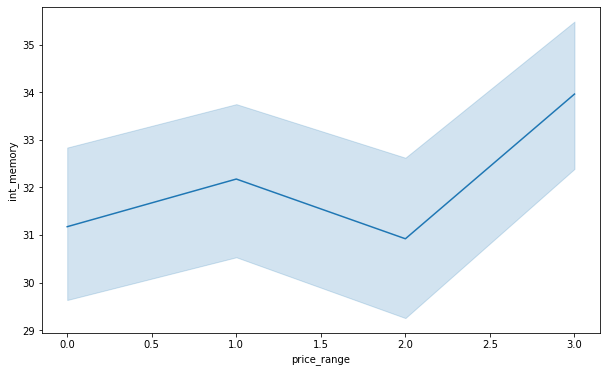

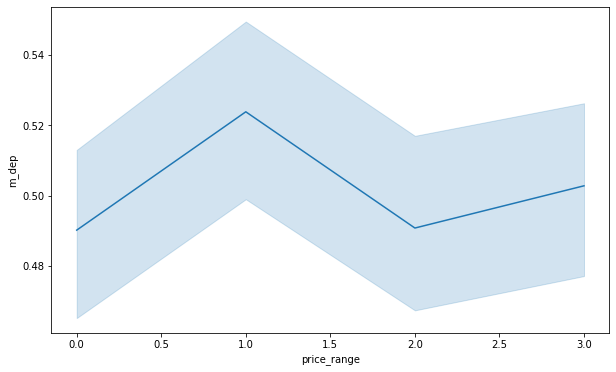

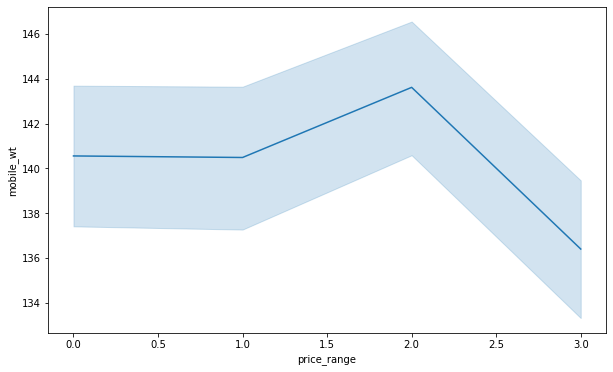

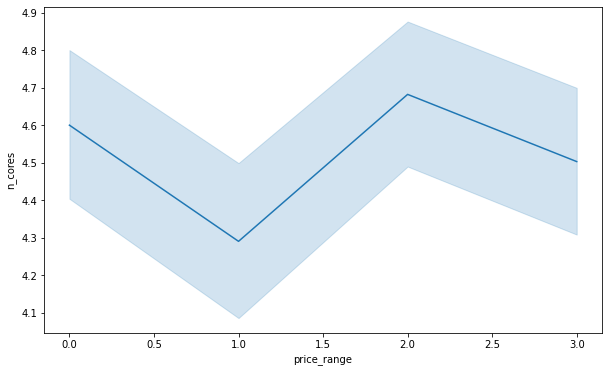

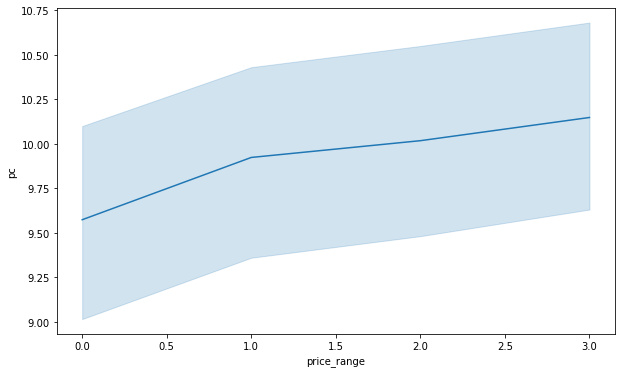

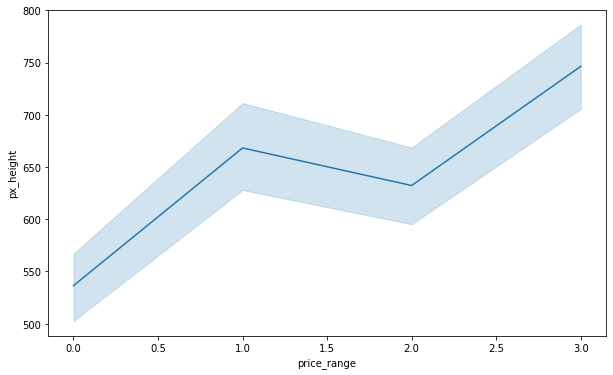

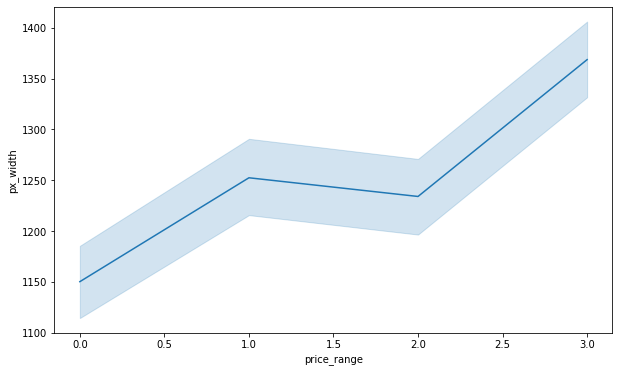

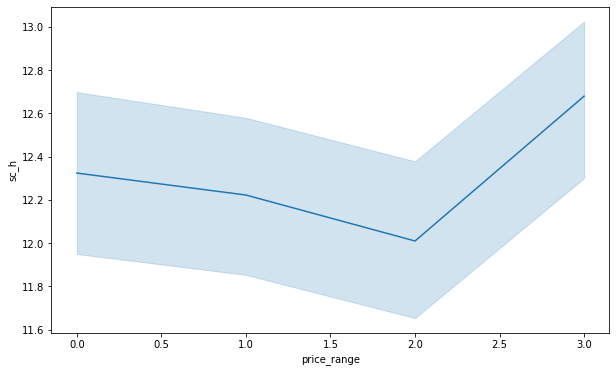

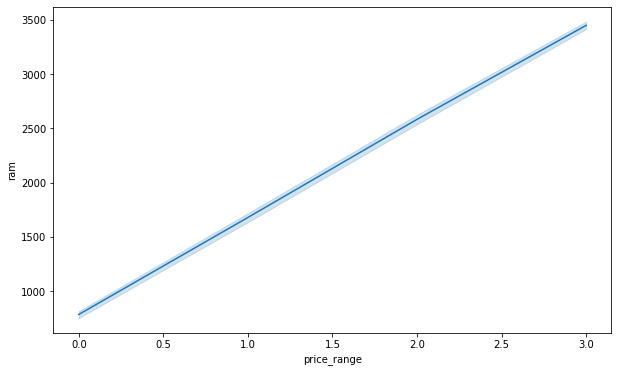

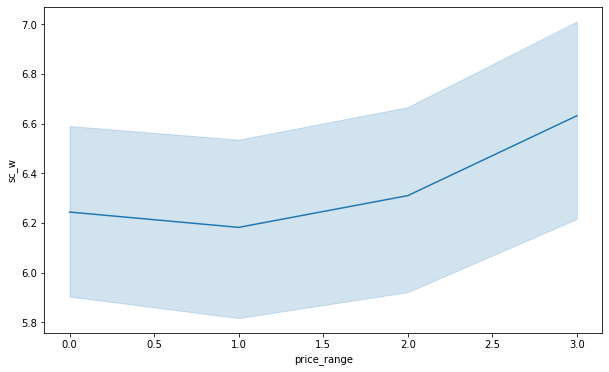

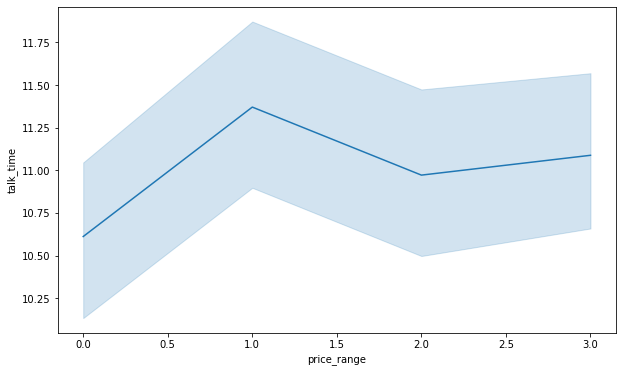

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=mobile_df['price_range'],y=mobile_df[var])

plotting boXplot

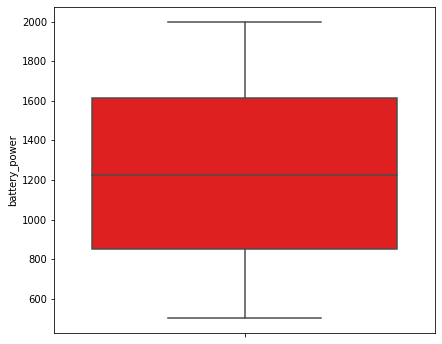

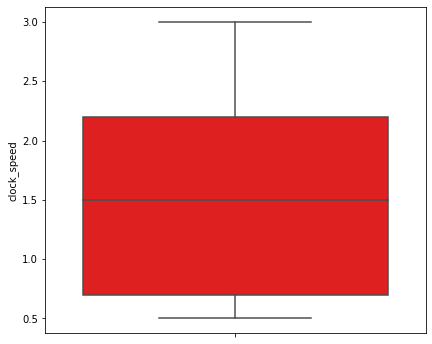

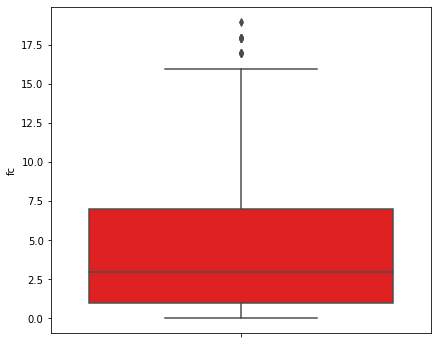

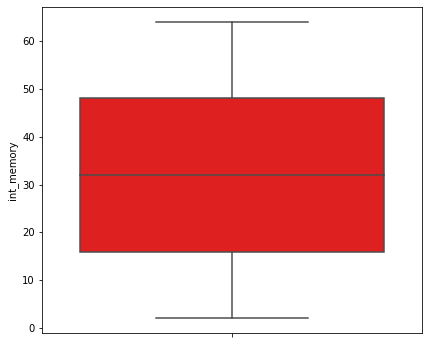

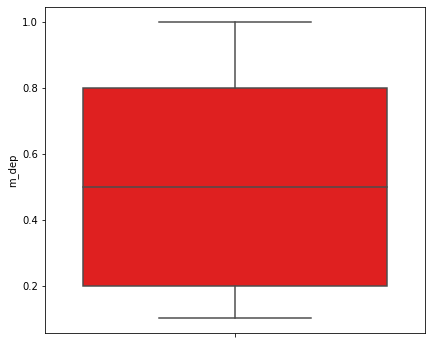

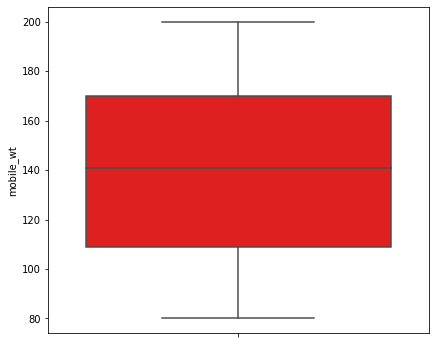

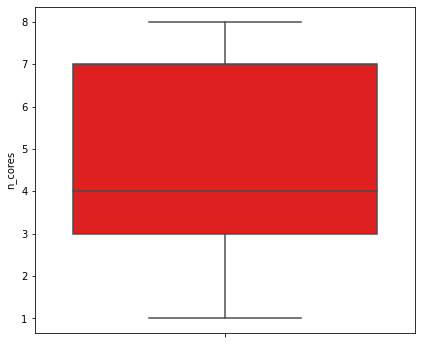

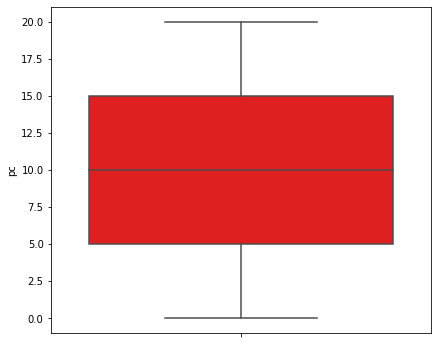

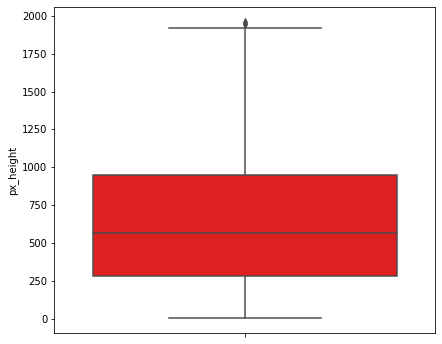

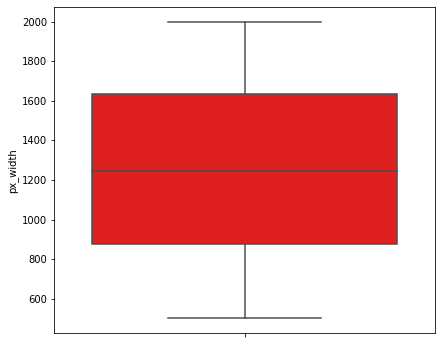

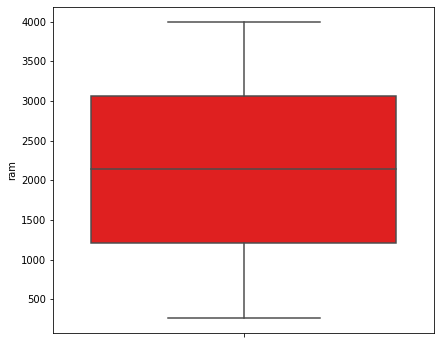

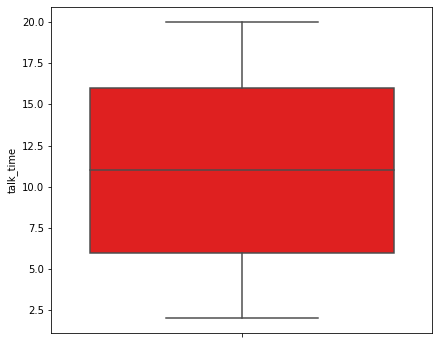

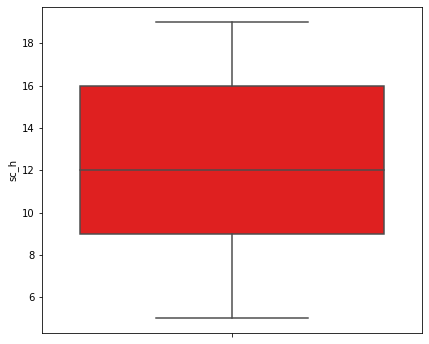

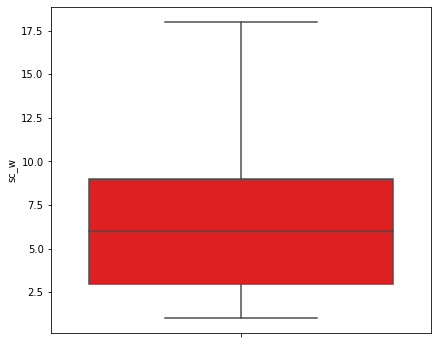

In [ ]:
for var in num_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

outlier detect

In [ ]:
Q1 = mobile_df["fc"].quantile(0.25)
Q3 = mobile_df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_df = mobile_df[(mobile_df['fc'] <= Q3)]

In [ ]:
Q1 = mobile_df["px_height"].quantile(0.25)
Q3 = mobile_df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_df = mobile_df[(mobile_data['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


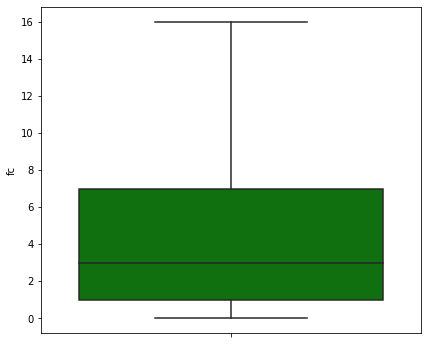

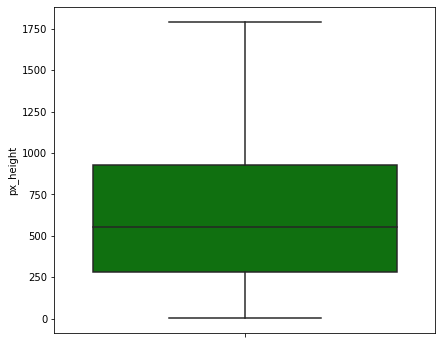

In [ ]:
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

In [ ]:
mobile_df.shape

(1962, 21)

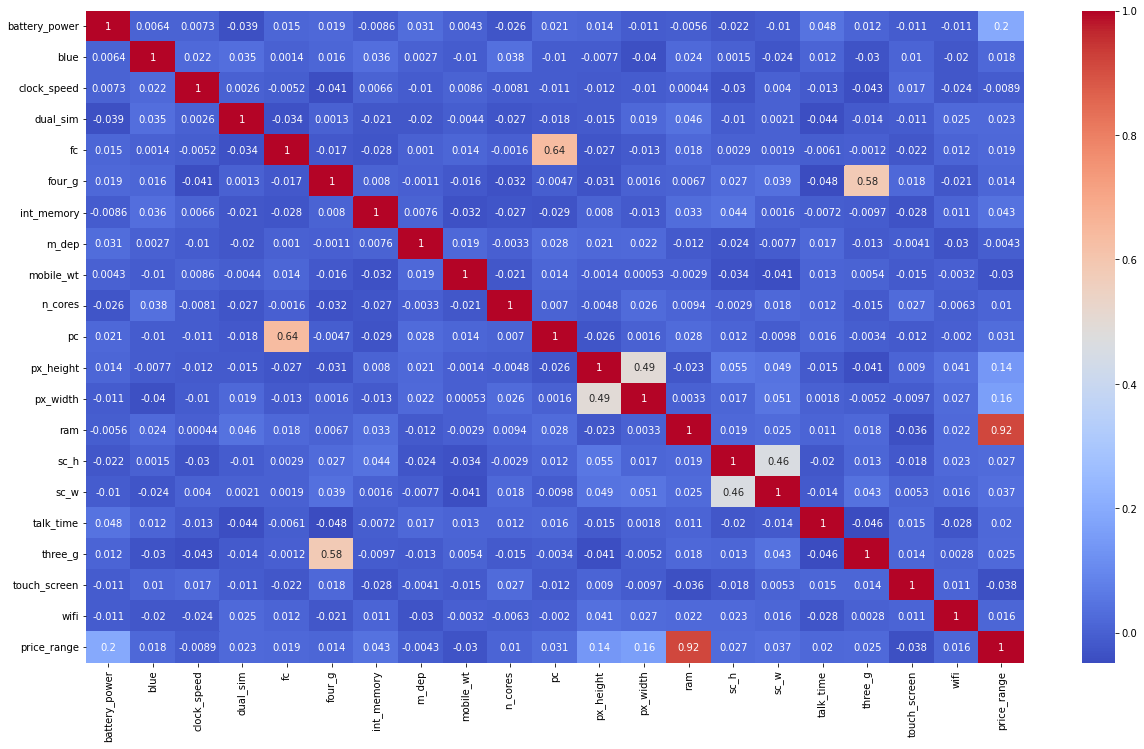

In [ ]:
plt.figure(figsize=(21,12))
sns.heatmap(mobile_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Feature Selection